# **PROBABILITY** **DISTRIBUTIONS**

Belajar menggunakan distribusi normal untuk memodelkan data dan juga belajar menghitung skor-z untuk menemukan outlier dalam data. Selain pandas, numpy, dan matplotlib, saya menggunakan dua paket Python: Statistik SciPy dan Statsmodels. 

**SciPy** adalah perangkat lunak sumber terbuka yang dapat digunakan untuk memecahkan masalah matematika, ilmiah, teknik, dan teknis. Perangkat lunak ini memungkinkan untuk memanipulasi dan memvisualisasikan data dengan berbagai perintah Python. 

**Statistik SciPy** adalah modul yang dirancang khusus untuk statistik.

**Statsmodels** adalah paket Python yang memungkinkan menjelajahi data, bekerja dengan model statistik, dan melakukan tes statistik. Paket ini mencakup daftar ekstensif fungsi statistik untuk berbagai jenis data. 


In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy import stats
import statsmodels.api as sm

In [9]:
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/MyDrive/education_districtwise
!ls

Mounted at /content/drive
/content/drive/MyDrive/education_districtwise
'Literacy Data 2011.csv'


**Note**: 
Dapat menggunakan dropna() untuk menghapus nilai yang hilang pada data.

In [10]:
all_data = pd.DataFrame()

#load data google drive
all_data = pd.DataFrame()
df = pd.read_csv('/content/drive/MyDrive/education_districtwise/Literacy Data 2011.csv')
all_data = all_data.append(df,ignore_index=True)
    
df = all_data

<ipython-input-10-e16b7726f45b>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(df,ignore_index=True)


In [11]:
df

,Unnamed: 0,District,State,Literacy
0,1,Thane,Maharashtra,84.53
1,2,North Twenty Four Parganas,West Bengal,84.06
2,3,Bangalore,Karnataka,87.67
3,4,Pune,Maharashtra,86.15
4,5,Mumbai Suburban,Maharashtra,89.91
...,...,...,...,...
635,636,Nicobars,Andaman And Nicobar Islands,78.06
636,637,Upper Siang,Arunachal Pradesh,59.99
637,638,Lahul and Spiti,Himachal Pradesh,76.81
638,639,Anjaw,Arunachal Pradesh,56.46


# **1.0.1 Describe()**

Ketika menghitung statistik deskriptif di Python, fungsi yang paling berguna untuk diketahui adalah describe(). Para profesional data menggunakan fungsi describe() sebagai cara yang mudah untuk menghitung banyak statistik kunci sekaligus. Untuk kolom numerik, describe() memberikan Anda keluaran sebagai berikut:
- count: Jumlah pengamatan non NA/null
- mean: Rata-rata aritmatika
- std: Standar deviasi
- min: Nilai terkecil (minimum)
- 25%: Kuartil pertama (persentil ke-25)
- 50%: Median (persentil ke-50)
- 75%: Kuartil ketiga (persentil ke-75)
1
- max: Nilai terbesar (maksimum)

In [12]:
df.describe()

,Unnamed: 0,Literacy
count,640.000000,640.000000
mean,320.500000,72.308422
std,184.896367,10.488816
min,1.000000,36.100000
25%,160.750000,65.095000
50%,320.500000,72.170000
75%,480.250000,79.962500
max,640.000000,97.910000


# **1.0.2 Range**

**Rentang** adalah perbedaan antara nilai terbesar dan terkecil dalam kumpulan data. Dengan kata lain, rentang = maks - min.  Dapat juga menggunakan max() dan min() untuk menghitung rentang untuk tingkat melek huruf dari semua kabupaten/kota dalam set data.


In [13]:
range_overall_li = df['Literacy'].max() - df['Literacy'].min()
range_overall_li

61.809999999999995

In [14]:
df.columns

Index(['Unnamed: 0', 'District', 'State', 'Literacy'], dtype='object')

In [15]:
df.isnull().sum()

Unnamed: 0    0
District      0
State         0
Literacy      0
dtype: int64

<Axes: >

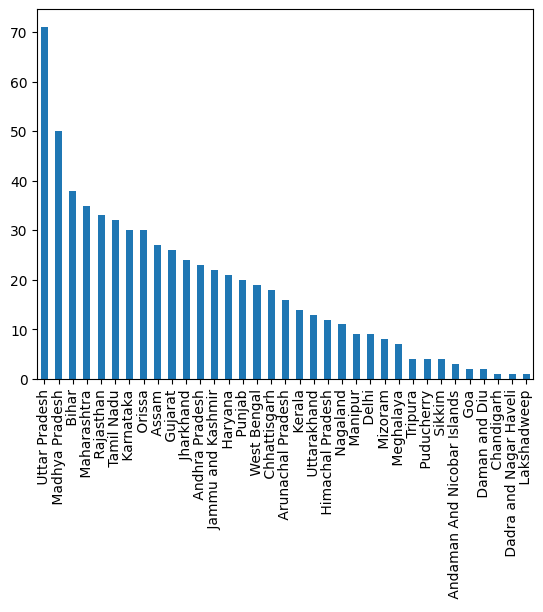

In [16]:
df['State'].value_counts().plot.bar()

In [17]:
df.groupby('State')['Literacy'].value_counts()

State                         Literacy
 Andaman And Nicobar Islands  78.06       1
                              83.91       1
                              89.13       1
 Andhra Pradesh               55.04       1
                              58.89       1
                                         ..
 West Bengal                  81.80       1
                              83.31       1
                              84.06       1
                              86.31       1
                              87.02       1
Name: Literacy, Length: 637, dtype: int64

# **1.1 Memodelkan data Anda dengan distribusi probabilitas**

Studi Kasus, Anda adalah seorang profesional data yang bekerja untuk departemen pendidikan di sebuah negara besar. Saya menganalisis data tentang tingkat melek huruf untuk setiap distrik, dan telah menghitung statistik deskriptif untuk meringkas data. Untuk bagian analisis selanjutnya, saya akan mencari tahu apakah data tingkat melek huruf di suatu kabupaten sesuai dengan jenis distribusi probabilitas tertentu.

## **1.1.1 Membuat plot histogram**

Langkah pertama dalam mencoba memodelkan data dengan distribusi probabilitas adalah memplot histogram. Ini akan membantu memvisualisasikan bentuk data dan menentukan apakah data tersebut menyerupai bentuk distribusi tertentu. 

Gunakan fungsi histogram matplotlib untuk memplot histogram dari data tingkat melek huruf di suatu kabupaten. Ingat bahwa kolom Literacy berisi data ini.

<Axes: >

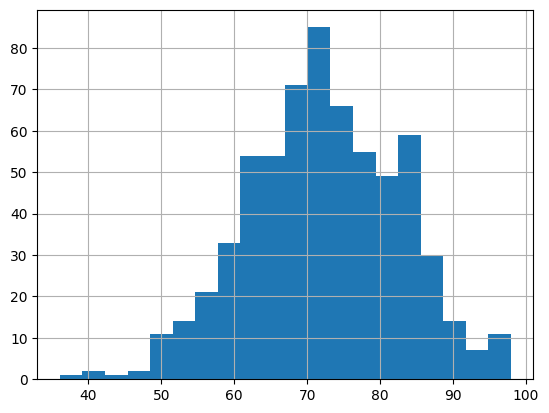

In [18]:
df['Literacy'].hist(bins=20)

## **1.1.2 Distribusi normal**

**Histogram** menunjukkan bahwa distribusi data tingkat melek huruf berbentuk lonceng dan simetris terhadap rata-rata. Rata-rata tingkat melek huruf, yaitu sekitar 73%, terletak di tengah plot. Ingatlah bahwa **distribusi normal** adalah distribusi probabilitas kontinu yang berbentuk lonceng
dan simetris di kedua sisi rata-rata. Bentuk histogram Anda menunjukkan bahwa distribusi normal distribusi normal mungkin merupakan pilihan pemodelan yang baik untuk data Anda.

## **1.1.3 Aturan empiris**

Karena distribusi normal tampaknya cocok untuk data tingkat melek huruf kabupaten dapat mengharapkan aturan empiris berlaku relatif baik. Ingat bahwa aturan empiris mengatakan bahwa untuk distribusi normal:
- 68% dari nilai berada dalam +/- 1 SD dari rata-rata
- 95% nilai berada dalam rentang +/- 2 SD dari rata-rata
- 99,7% nilai berada dalam +/- 3 SD dari rata-rata

(**Note**: "SD" adalah singkatan dari standar deviasi)

Dengan kata lain, Anda dapat mengharapkan sekitar:
- 68% dari tingkat literasi kabupaten akan berada dalam +/- 1 SD dari rata-rata
- 95% dari tingkat literasi kabupaten akan berada dalam +/- 2 SD dari rata-rata
- 99,7% dari tingkat literasi kabupaten akan berada dalam +/- 3 SD dari rata-rata.

Pertama, beri nama dua variabel baru untuk menyimpan nilai rata-rata dan standar deviasi kabupaten tingkat melek huruf kabupaten: mean_literacy dan std_literacy.

In [19]:
mean_literacy = df['Literacy'].mean()
mean_literacy

72.308421875

Tingkat melek huruf rata-rata di kabupaten ini adalah sekitar 72,3%.

In [20]:
std_literacy = df['Literacy'].std()
std_literacy

10.488815587815504

Deviasi standar sekitar 10%.

Sekarang, persentase aktual dari tingkat literasi distrik yang berada dalam +/- 1 SD dari rata-rata.

Untuk melakukan ini, pertama-tama beri nama dua variabel baru: batas_bawah dan batas_atas. Batas bawah akan
akan menjadi satu SD di bawah rata-rata, atau rata-rata - (1 * SD). Batas atas akan menjadi satu SD di atas
rata-rata, atau rata-rata + (1 * SD). Untuk menulis kode untuk perhitungan, dua variabel sebelumnya, mean_literacy dan std_literacy, untuk mean dan standar deviasi.

Kemudian, tambahkan baris kode baru yang memberi tahu komputer untuk memutuskan apakah setiap nilai dalam kolom Literasi berada di antara batas bawah dan batas atas. Untuk melakukan hal ini, gunakan operator relasional lebih besar dari atau sama dengan (>=) dan kurang dari atau sama dengan (<=), dan operator bitwise AND (&). Terakhir, menggunakan mean() untuk membagi jumlah nilai yang berada dalam 1 SD dari mean dengan jumlah total nilai.

In [21]:
lower_limit = mean_literacy - 1 * std_literacy
upper_limit = mean_literacy + 1 * std_literacy
((df['Literacy'] >= lower_limit)&(df['Literacy'] <= upper_limit)).mean()

0.6578125

Selanjutnya, gunakan struktur kode yang sama untuk menghitung persentase aktual tingkat literasi kabupaten yang
berada dalam rentang +/- 2 SD dari rata-rata.

In [ ]:
lower_limit = mean_literacy - 2 * std_literacy
upper_limit = mean_literacy + 2 * std_literacy
((df['Literacy'] >= lower_limit)&(df['Literacy'] <= upper_limit)).mean()

0.9515625

Terakhir, gunakan struktur kode yang sama untuk menghitung persentase aktual tingkat literasi kabupaten yang
berada dalam rentang +/- 3 SD dari rata-rata.

In [22]:
lower_limit = mean_literacy - 3 * std_literacy
upper_limit = mean_literacy + 3 * std_literacy
((df['Literacy'] >= lower_limit)&(df['Literacy'] <= upper_limit)).mean()

0.9984375

Nilai-nilai tersebut cukup sesuai dengan aturan empiris!

Nilai 66,4%, 95,4%, dan 99,6% sangat dekat dengan nilai yang disarankan oleh aturan empiris: sekitar 68%, 95%, dan 99,7%.
Mengetahui bahwa data terdistribusi secara normal berguna untuk analisis karena banyak tes statistik dan model pembelajaran mesin mengasumsikan distribusi normal. Selain itu, ketika data mengikuti distribusi normal, Anda dapat menggunakan skor z untuk mengukur posisi relatif nilai dan menemukan pencilan dalam data

## **1.2 Compute z-scores to find outliers**

**Skor-z** adalah ukuran berapa banyak deviasi standar di bawah atau di atas rata-rata populasi dari suatu titik data. Skor-z berguna karena memberi tahu di mana letak suatu nilai dalam suatu distribusi. Para profesional data sering menggunakan z-skor untuk mendeteksi outliners. Biasanya, mereka menganggap pengamatan dengan z-score lebih kecil dari -3 atau lebih besar dari +3 sebagai outliners. Dengan kata lain, ini adalah nilai yang terletak lebih dari +/- 3 SD dari rata-rata. Untuk menemukan outliners dalam data, pertama-tama buat kolom baru bernama Z_SCORE yang berisi skor-z untuk untuk setiap tingkat literasi kabupaten dalam set data. Ingat bahwa kolom Literacy mencantumkan semua kabupaten/kota tingkat melek huruf.

Kemudian menghitung skor-z menggunakan fungsi scipy.stats.zscore()

In [25]:
df['Z_SCORE'] = stats .zscore(df['Literacy'])
df

,Unnamed: 0,District,State,Literacy,Z_SCORE
0,1,Thane,Maharashtra,84.53,1.166112
1,2,North Twenty Four Parganas,West Bengal,84.06,1.121268
2,3,Bangalore,Karnataka,87.67,1.465713
3,4,Pune,Maharashtra,86.15,1.320683
4,5,Mumbai Suburban,Maharashtra,89.91,1.679441
...,...,...,...,...,...
635,636,Nicobars,Andaman And Nicobar Islands,78.06,0.548782
636,637,Upper Siang,Arunachal Pradesh,59.99,-1.175353
637,638,Lahul and Spiti,Himachal Pradesh,76.81,0.429515
638,639,Anjaw,Arunachal Pradesh,56.46,-1.512165


Sekarang setelah menghitung nilai-z untuk set data, berikut adalah beberapa kode untuk mengidentifikasi outliners, atau kabupaten dengan nilai-z yang lebih dari +/- 3 SD dari rata-rata. Gunakan operator relasional lebih besar dari (>) dan kurang dari (<), dan operator bitwise OR (|).

In [28]:
df[(df['Z_SCORE'] > 3) | (df['Z_SCORE'] < -3)]

,Unnamed: 0,District,State,Literacy,Z_SCORE
497,498,Alirajpur,Madhya Pradesh,36.10,-3.454798
580,581,Bijapur,Chhattisgarh,40.86,-3.000627


Dengan menggunakan z-skor dapat digunakan untuk mengidentifikasi dua kabupaten terpencil yang memiliki tingkat melek huruf yang sangat rendah. Tingkat literasi di dua kabupaten ini lebih dari 3 SD lebih dari 3 SD di bawah rata-rata angka melek huruf secara keseluruhan. Analisis ini memberikan informasi penting untuk dibagikan. Pemerintah mungkin perlu menyediakan lebih banyak dana dan sumber daya ke dua kabupaten ini dengan harapan dapat meningkatkan literasi secara signifikan.